In [80]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import sklearn

from skimage.color import rgb2grey
from skimage.transform import resize, rotate, AffineTransform, warp
from sklearn.feature_extraction.image import extract_patches_2d

In [2]:
pwd

'/Users/lucasmueller/Repositories/DeepVisionLecture/sheet01'

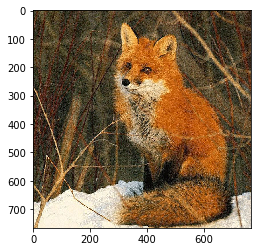

In [35]:
# load image
img = plt.imread("material/red-fox.jpg")
plt.imshow(img); plt.show()

In [4]:
# print w h c
print("Width: {}, Height: {}, Channels: {}".format(img.shape[0], img.shape[1], img.shape[2]))

Width: 766, Height: 766, Channels: 3


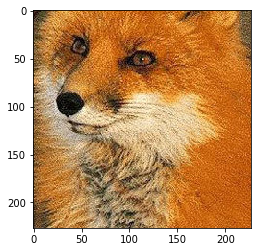

In [11]:
# a random patch
patch_random = extract_patches_2d(img, (227, 227), 1)
plt.imshow(patch_random.squeeze()); plt.show()

/Users/lucasmueller/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


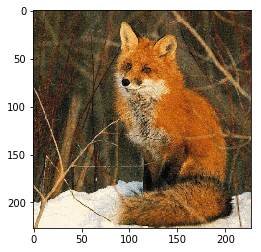

In [15]:
# resize
img_resized = resize(img, (227, 227))
plt.imshow(img_resized); plt.show()

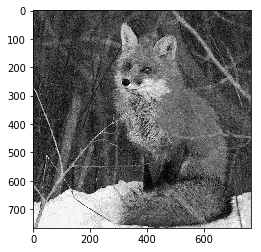

In [20]:
# to grey
img_gray = rgb2grey(img)
plt.imshow(img_gray, cmap='gray'); plt.show()  # cmap shall not be grey but gray :D 

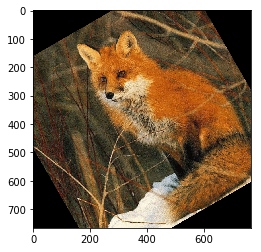

In [23]:
# rotate
img_rotate = rotate(img, 30)
plt.imshow(img_rotate, cmap='gray'); plt.show()

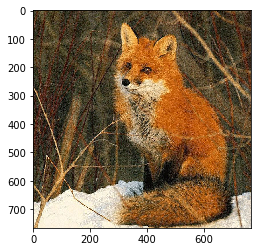

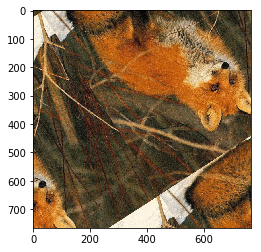

In [62]:
# arbitrary affine transformation
def a_affine_transformation(img):
    return img
img_affine = a_affine_transformation(img)
plt.imshow(img_affine); plt.show()

# but here you get what you want
class ArbitraryAffine:
    def __init__(self, rotation, translation):
        self.trans = AffineTransform(translation=translation, rotation=rotation)
    
    def forward(self, img):
        return warp(img, self.trans, mode='wrap', preserve_range=True).astype(img.dtype)

img_affine = ArbitraryAffine(10, (20, 20)).forward(img)
plt.imshow(img_affine); plt.show()

# All in One

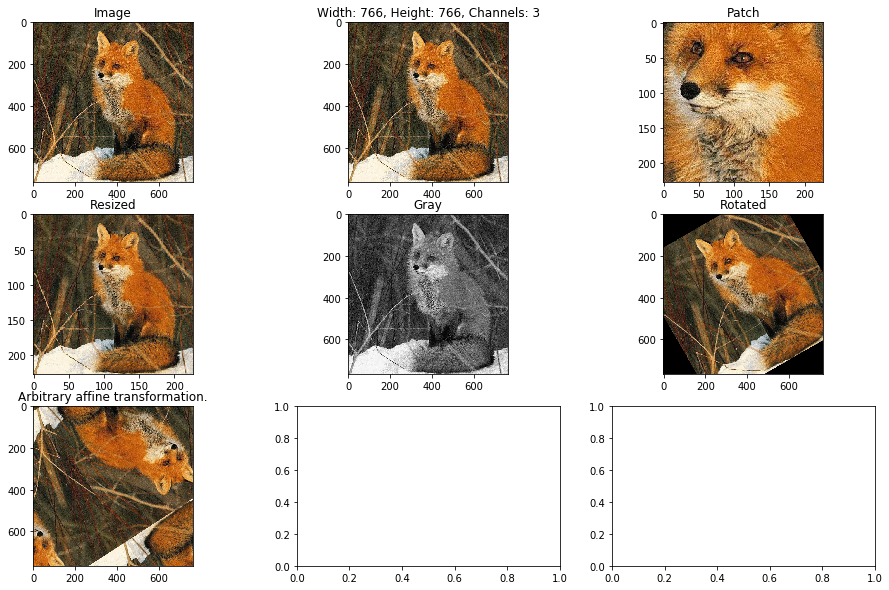

In [78]:

fig, ax = plt.subplots(3, 3, figsize=(16, 10))

ax[0, 0].imshow(img); ax[0, 0].set_title('Image')
ax[0, 1].imshow(img); ax[0, 1].set_title("Width: {}, Height: {}, Channels: {}".format(img.shape[0], img.shape[1], img.shape[2]))
ax[0, 2].imshow(patch_random.squeeze()); ax[0, 2].set_title("Patch")
ax[1, 0].imshow(img_resized); ax[1, 0].set_title("Resized")
ax[1, 1].imshow(img_gray, cmap='gray'); ax[1, 1].set_title("Gray")
ax[1, 2].imshow(img_rotate); ax[1, 2].set_title("Rotated")
ax[2, 0].imshow(img_affine); ax[2, 0].set_title("Arbitrary affine transformation.")

plt.show()